##Task 3: To Explore Unsupervised Machine Learning (K-Means Clustering).
From the given ‘Iris’ dataset, we need to predict the optimum number of clusters and represent it visually.




Importing required libraries

In [4]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Importing the Data

In [5]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


No. rows and columns

In [6]:
print("Dataset has",data.shape[0],"rows and",data.shape[1],"columns")


Dataset has 150 rows and 6 columns


To check null values

In [7]:
print(data.isnull().sum())
print("Data doesn't have any null value")

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Data doesn't have any null value


Some Descriptice statistics and plots

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


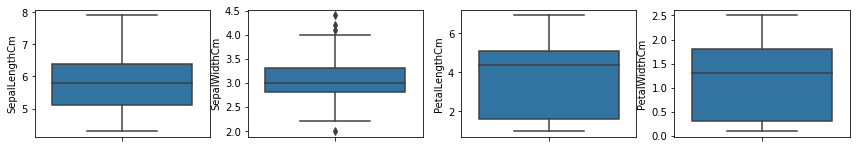

In [9]:
numerical_features = data.select_dtypes(exclude=['object']).drop(["Id"],axis=1).copy()
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()


Plotting Correlation matrix

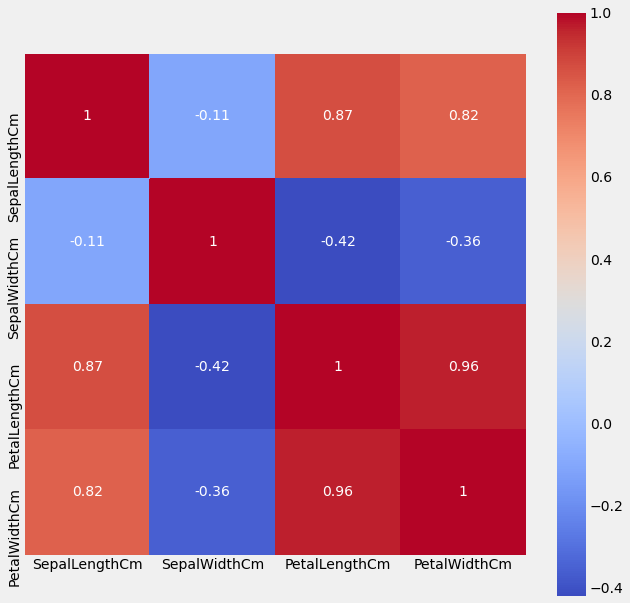

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(),cmap="coolwarm",annot=True,square=True,)

Optimum no. of clusters

In [11]:
x=data.iloc[:,1:5].values
WCSS=[]
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

Plotting graph to find the optimum no. of clusters using elbow method

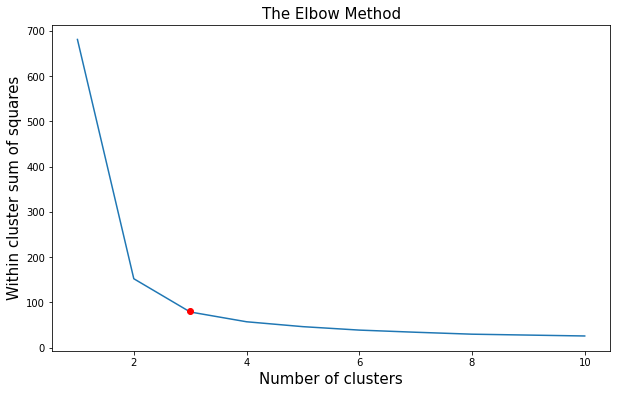

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), WCSS) 
plt.plot(range(3, 4), range(81, 82), 'ro')
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Within cluster sum of squares', fontsize = 15);

The optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. The highlighted red dot which shows the number of clusters as 3 is the optimum number of clusters.

Training the model with optimum no. clusters.

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
x_pred = kmeans.fit_predict(x)

In [14]:
print(x_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Visualization of the clustered plot.

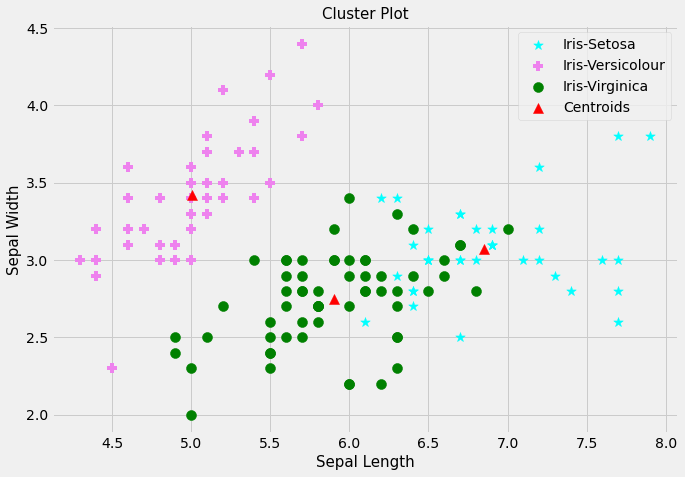

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 7))
plt.title('Cluster Plot', fontsize = 15)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)

plt.scatter(x[x_pred == 0, 0], x[x_pred == 0, 1], s = 100, c = 'cyan', label = 'Iris-Setosa',marker="*")

plt.scatter(x[x_pred == 1, 0], x[x_pred == 1, 1], s = 100, c = 'violet', label = 'Iris-Versicolour',marker="+")

plt.scatter(x[x_pred == 2, 0], x[x_pred == 2, 1], s = 100, c = 'green', label = 'Iris-Virginica',marker="o")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids',marker="^")

plt.legend(loc = 'best');